In [3]:
import numpy as np 
import scipy.optimize as opt 
import matplotlib.pyplot as plot 
import scipy.signal as sig

In [4]:
plot.rcParams.update({'font.size' : 20})
plot.rcParams.update({'figure.figsize' :[12, 8]})

In [5]:
def load_data(file_path): 
    # load the ODMR data file in to an np array 
    data_array = np.loadtxt(file_path)
    return(data_array)

In [12]:
def create_square_wave(x, A, B, C, D, phi):
    # generate a sqaure wave 
    # A = amplitude, B = frequency, C = Y offset.
    y = A*sig.square(2*np.pi*B*x + phi, duty = D) + C
    return(y)

In [20]:
def optimise_square(t, y, freq, duty, phase):
    
    p0 = [0.5*(np.max(y) - np.min(y)), freq, np.mean(y), duty, phase]
    
    print('Initial Guess \n' + 
        'Amplitude = ' + str(p0[0]) + '\n' +
          'Frequency = ' + str(p0[1]) + '\n' +
          'Offset = ' + str(p0[2]) + '\n' +
          'Duty Cycle = ' + str(p0[3]) + '\n' + 
          'Phase constant = ' + str(p0[4]) )
    
    lower_bound = [p0[0]*0.5, freq*0.99, 0, duty-0.1, -np.pi]
    upper_bound = [p0[0]*1.5, freq*1.01, np.max(y), duty+0.1, np.pi]
    
    opt_params, confidence = opt.curve_fit(create_square_wave, t, y, 
                                          p0, bounds = (lower_bound, upper_bound))
    
    y_fit = create_square_wave(t, opt_params[0], opt_params[1], opt_params[2], 
                              opt_params[3], opt_params[4])
    print('\n First Pass optimisation \n' +
        'Amplitude = ' + str(opt_params[0]) + '\n' +
          'Frequency = ' + str(opt_params[1]) + '\n' +
          'Offset = ' + str(opt_params[2]) + '\n' +
          'Duty Cycle = ' + str(opt_params[3]) + '\n' + 
          'Phase constant = ' + str(opt_params[4]) )
          
    return(y_fit)

In [14]:
def find_phase_constant(y, sample_frequnecy, freq):
    
    points = int(sample_frequnecy/freq)
    mean_counts = np.mean(y)
    ratio = []
    
    for i in range(points):
        if y[i] > mean_counts:
            ratio.append(1)
        else:
            ratio.append(0)
    ratio = np.array(ratio)
    find_indicies = np.where(ratio==1)[0]
    print(find_indicies)
    index = []
    
    for i in range(len(find_indicies)-1):
        if find_indicies[i]+1 != find_indicies[i+1]:
            index.append(i+1)
    
    if index == []:
        index.append(find_indicies[0])
    print(index)
    phase_constant_guess = (index[0]*(np.pi))/points
    
    return(phase_constant_guess)

In [15]:
# load in square wave data

data = load_data('I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\ODMR\\ODMR and imaging\\20201211\\20201211_NVScan_03.dat')
square_wave = data[0,0:100]

In [18]:
points = len(square_wave)
dwelltime = 10**-4 #s

sample_frequnecy = 10000

duty = 0.5

time = np.linspace(0, points*dwelltime, points)
freq = 1000 # hertz 

#y_fit = optimise_square(time, square_wave, freq, duty, phase = 0)

[0 1 2 3 8 9]
[4]
1.2566370614359172
Initial Guess 
Amplitude = 49.5
Frequency = 1000
Offset = 76.01
Duty Cycle = 0.5
Phase constant = 1.2566370614359172

 First Pass optimisation 
Amplitude = 24.750000017755273
Frequency = 1000.0
Offset = 76.00999972769335
Duty Cycle = 0.5
Phase constant = 1.2566370614359172


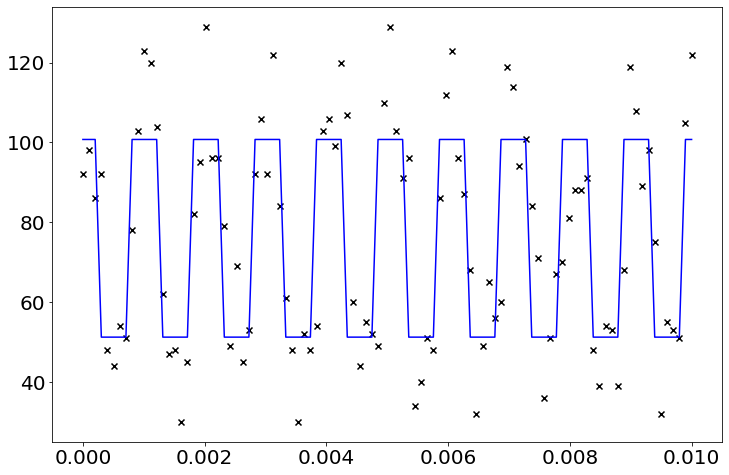

In [21]:
plot.scatter(time, square_wave, marker = 'x', color = 'k')
#plot.plot(time, y_fit, color = 'r')

phi_guess = find_phase_constant(square_wave, sample_frequnecy, freq)

y_fit_2 = optimise_square(time, square_wave, freq, duty, phase = phi_guess)

plot.plot(time, y_fit_2, color = 'b')

In [29]:
print(8*np.pi/10)

2.5132741228718345
